In [1]:
import pandas as pd
import seaborn as sb
%matplotlib inline

In [2]:
#load the dataset
energy = pd.read_csv('energydata_complete.csv')

In [3]:
energy.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


<AxesSubplot:xlabel='T2', ylabel='T6'>

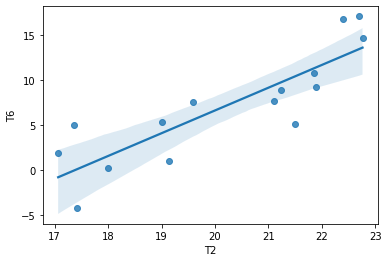

In [4]:
#select a sample of the dataset
simple_linear_reg_df = energy[['T2', 'T6']].sample(15, random_state=2)
#regression plot
sb.regplot(x="T2", y="T6", data=simple_linear_reg_df)

In [5]:
# dropping the light and date column
energy.drop(['lights'], axis=1,inplace=True)
energy.drop(['date'], axis=1, inplace=True)
#Normalizing data using Min-Max scaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
normalised_energy = pd.DataFrame(scaler.fit_transform(energy), columns=energy.columns)
features_energy = normalised_energy.drop(columns=['Appliances'])
target = normalised_energy['Appliances']
#Now, we split our dataset into the training and testing dataset.
x_train, x_test, y_train, y_test = train_test_split(features_energy,target, test_size=0.3, random_state=42)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [6]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.05

In [7]:
#R-square error
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [8]:
#Residual Sum of Squares
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)	

45.35

In [9]:
#Root mean square error
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
predicted1_values = lasso_reg.predict(x_test)

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted1_values))
round(rmse, 3)

0.094

In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
predicted2_values = ridge_reg.predict(x_test)

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted2_values))
round(rmse, 3)

0.088

In [12]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [13]:
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0          RH_2            -0.456698     -0.411071     -0.000000
1         T_out            -0.321860     -0.262172      0.000000
2            T2            -0.236178     -0.201397      0.000000
3            T9            -0.189941     -0.188916     -0.000000
4          RH_8            -0.157595     -0.156830     -0.000110
5        RH_out            -0.077671     -0.054724     -0.049557
6          RH_7            -0.044614     -0.045977     -0.000000
7          RH_9            -0.039800     -0.041367     -0.000000
8            T5            -0.015657     -0.019853     -0.000000
9            T1            -0.003281     -0.018406      0.000000
10          rv1             0.000770      0.000748     -0.000000
11          rv2             0.000770      0.000748     -0.000000
12  Press_mm_hg             0.006839      0.006584     -0.000000
13           T7             0.010319      0.010098     -0.000000
14   Visibility          